In [70]:
import pandas as pd
import pylab as plt
import numpy as np
%matplotlib inline
from __future__ import division
import pprint
from collections import Counter
import seaborn

In [71]:
protein = 'CW5-155PriT_GP_proteins.xlsx'
peptide = 'CW5-155PriT_GP_peptides.xlsx'
glycopeptide = 'CW5-155_Glycan_peptides.xlsx'
chartpattern = 'CW5-157-ChartPattern.xlsx'

In [72]:
df = pd.read_excel(peptide,sheetname='Sheet1')
dfp = pd.read_excel(protein,sheetname='Sheet1' )
dfgp = pd.read_excel(glycopeptide,sheetname='Sheet1')
cp = pd.read_excel(chartpattern,sheetname='Sheet1' )

In [73]:
#### peptide sheet analysis to quantify on glycoprotein level ####

In [74]:
#testing out the apply method to remove accessions after the semicolon
#pd.concat([df['Protein Group Accessions'], df['Protein Group Accessions'].apply(lambda x: str(x).split(';')[0])],axis=1)
df['Protein Group Accessions'] = df['Protein Group Accessions'].apply(lambda x: str(x).split(';')[0])

In [75]:
#some Protein Group Accessions have multiples. choose the first one only

df_filtered = df[['Sequence','Protein Group Accessions','Precursor Area','Spectrum File']]

In [76]:
f = {'Precursor Area':['count','sum','mean']}
df_group = df_filtered.groupby(['Spectrum File','Protein Group Accessions']).agg(f)
df_group.head(10)

Precursor Area  \
                                                             count   
Spectrum File              Protein Group Accessions                  
5157_PriT_PMAI_trypsin.raw A0AVT1                                7   
                           A0FGR8                                7   
                           A2A288                                0   
                           A2RRP1                                1   
                           A2VDJ0                                2   
                           A3KN83                                7   
                           A4D1P6                                1   
                           A5YKK6                               15   
                           A5YM72                                0   
                           A6NCF6                                2   

                                                                              
                                                             sum        mean  
Spectrum File              Protein Group Accessions                           
5157_PriT_PMAI_trypsin.raw A0AVT1                    81612466.17 11658923.74  
                           A0FGR8                   115470293.16 16495756.17  
                           A2A288                            nan         nan  
                           A2RRP1                     5827593.25  5827593.25  
                           A2VDJ0                      589530.67   294765.34  
                           A3KN83                    59991900.39  8570271.48  
                           A4D1P6                     3651344.38  3651344.38  
                           A5YKK6                   189947114.58 12663140.97  
                           A5YM72                            nan         nan  
                           A6NCF6                     2874905.00  1437452.50

In [77]:
df['Spectrum File'].unique()

array([u'5157_PriT_anti328_trypsin.raw', u'5157_PriT_control_trypsin.raw',
       u'5157_PriT_PMAI_trypsin.raw'], dtype=object)

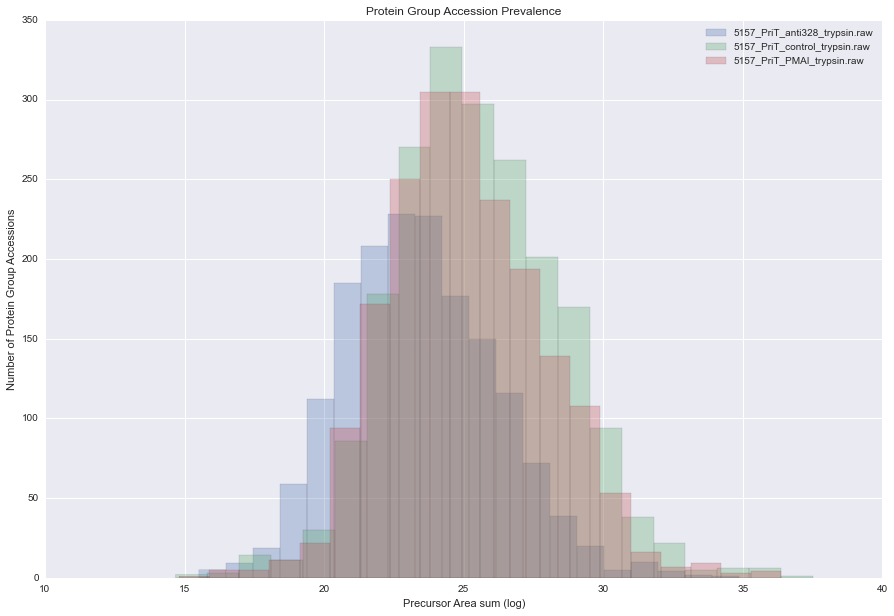

In [78]:
for val, spectrum_file in enumerate(df['Spectrum File'].unique()):
    np.log2(df_group.loc[spectrum_file].iloc[:,1]).hist(bins = 20, alpha = 0.3, figsize = (15,10), label = spectrum_file)
plt.legend()
plt.title('Protein Group Accession Prevalence')
plt.xlabel('Precursor Area sum (log)')
plt.ylabel('Number of Protein Group Accessions')


In [79]:
### Protein level analysis to quantify on glycoprotein level ####

In [80]:
df1 = df[['Sequence', 'Protein Group Accessions', 'Precursor Area','Spectrum File', 'Modifications', ]]
dfp1 = dfp[['Accession', 'Description', 'A8: Area', 'B8: Area', 'C8: Area', 'Gene Name', 'GO Ontology']]
dfp1.columns = ['Accession', 'Description', 'control area', 'anti328 area', 'PMAI area', 'Gene Name', 'GO ontology']


In [81]:
#Raw data missing values is 0. replace zero with one to avoid divison by zero
dfp3 = dfp1.replace(0,1)
dfp3['anti328_div_control'] =  np.log2(dfp3['anti328 area'] / dfp3['control area'] )
dfp3['PMAI_div_control'] = np.log2(dfp3['PMAI area'] / dfp3['control area'])

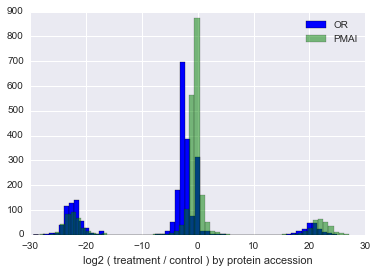

In [82]:
#ratio between anti and control in blue, ratio between PMAI and control in green
dfp3['anti328_div_control'].hist(bins=60, alpha = 1, color = 'b', label = 'OR')
dfp3['PMAI_div_control'].hist(bins=60, alpha = 0.5, color = 'g', label = 'PMAI')
plt.xlabel('log2 ( treatment / control ) by protein accession')
plt.legend()

In [83]:
dfp3[(abs(dfp3['anti328_div_control']) > 12) & (abs(dfp3['PMAI_div_control']) < 12) ]

Accession                                        Description  \
200          Q07021  Complement component 1 Q subcomponent-binding ...   
347   P0CW22;P08708  40S ribosomal protein S17-like OS=Homo sapiens...   
410          P30044  Peroxiredoxin-5, mitochondrial OS=Homo sapiens...   
444          Q6DD88  Atlastin-3 OS=Homo sapiens GN=ATL3 PE=1 SV=1 -...   
446          Q9ULC4  Malignant T-cell-amplified sequence 1 OS=Homo ...   
453          Q9Y5Y2  Cytosolic Fe-S cluster assembly factor NUBP2 O...   
469          O00170  AH receptor-interacting protein OS=Homo sapien...   
494          P28070  Proteasome subunit beta type-4 OS=Homo sapiens...   
535          C9J3I9  Putative uncharacterized protein C5orf58 OS=Ho...   
543          P60891  Ribose-phosphate pyrophosphokinase 1 OS=Homo s...   
562          Q8N2U0  Transmembrane protein 256 OS=Homo sapiens GN=T...   
573          Q9H993  UPF0364 protein C6orf211 OS=Homo sapiens GN=C6...   
596          P53999  Activated RNA polymerase II transcriptional co...   
602          Q99816  Tumor susceptibility gene 101 protein OS=Homo ...   
621          O00743  Serine/threonine-protein phosphatase 6 catalyt...   
647          Q6ZSR9  Uncharacterized protein FLJ45252 OS=Homo sapie...   
649          P51124  Granzyme M OS=Homo sapiens GN=GZMM PE=1 SV=2 -...   
654          Q9H9B4  Sideroflexin-1 OS=Homo sapiens GN=SFXN1 PE=1 S...   
662          Q7Z4W1  L-xylulose reductase OS=Homo sapiens GN=DCXR P...   
691          Q92506  Estradiol 17-beta-dehydrogenase 8 OS=Homo sapi...   
693          P26639  Threonine--tRNA ligase, cytoplasmic OS=Homo sa...   
707          Q92530  Proteasome inhibitor PI31 subunit OS=Homo sapi...   
714          Q96QR8  Transcriptional activator protein Pur-beta OS=...   
736          P41227  N-alpha-acetyltransferase 10 OS=Homo sapiens G...   
740          P49585  Choline-phosphate cytidylyltransferase A OS=Ho...   
749          P55809  Succinyl-CoA:3-ketoacid coenzyme A transferase...   
752          Q9Y3A3  MOB-like protein phocein OS=Homo sapiens GN=MO...   
771          O75951  Lysozyme-like protein 6 OS=Homo sapiens GN=LYZ...   
778          P09132  Signal recognition particle 19 kDa protein OS=...   
806          P17096  High mobility group protein HMG-I/HMG-Y OS=Hom...   
...             ...                                                ...   
2367         Q9Y666  Solute carrier family 12 member 7 OS=Homo sapi...   
2369         P35251  Replication factor C subunit 1 OS=Homo sapiens...   
2373         Q3LXA3  Bifunctional ATP-dependent dihydroxyacetone ki...   
2377         Q9ULE4  Protein FAM184B OS=Homo sapiens GN=FAM184B PE=...   
2378         Q2NL82  Pre-rRNA-processing protein TSR1 homolog OS=Ho...   
2389         Q9NZM4  Glioma tumor suppressor candidate region gene ...   
2393         O94915  Protein furry homolog-like OS=Homo sapiens GN=...   
2396         Q9Y5B6  PAX3- and PAX7-binding protein 1 OS=Homo sapie...   
2398         P07911  Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1 -...   
2405         A1L4H1  Soluble scavenger receptor cysteine-rich domai...   
2406         P55196  Afadin OS=Homo sapiens GN=MLLT4 PE=1 SV=3 - [A...   
2410         Q9P2E3  NFX1-type zinc finger-containing protein 1 OS=...   
2414         Q8N4C8  Misshapen-like kinase 1 OS=Homo sapiens GN=MIN...   
2419         P31629  Transcription factor HIVEP2 OS=Homo sapiens GN...   
2436         O94855  Protein transport protein Sec24D OS=Homo sapie...   
2437         Q8N3C0  Activating signal cointegrator 1 complex subun...   
2440         Q8N122  Regulatory-associated protein of mTOR OS=Homo ...   
2457         A4UGR9  Xin actin-binding repeat-containing protein 2 ...   
2458         O95644  Nuclear factor of activated T-cells, cytoplasm...   
2463         Q9NR96  Toll-like receptor 9 OS=Homo sapiens GN=TLR9 P...   
2466         A2RRP1  Neuroblastoma-amplified sequence OS=Homo sapie...   
2469         Q6ZR08  Dynein heavy chain 12, axonemal OS=Homo sapien...   
2472         P

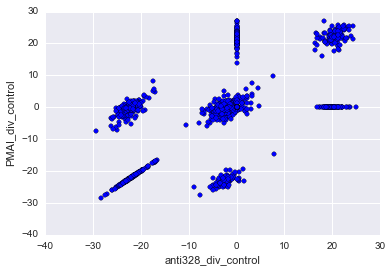

In [84]:
plt.scatter((dfp3['anti328_div_control']), (dfp3['PMAI_div_control']))
plt.xlabel('anti328_div_control')
plt.ylabel('PMAI_div_control')

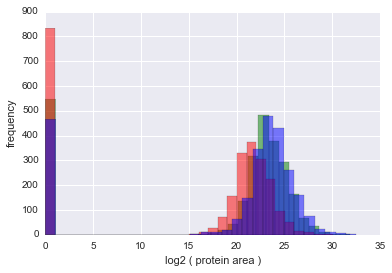

In [85]:
#raw area values between anti328 (blue) and control (green)

np.log2(dfp3['PMAI area']).hist(bins=30, alpha = 0.5, color='g')
np.log2(dfp3['anti328 area']).hist(bins=30, alpha = 0.5, color='r')
np.log2(dfp3['control area']).hist(bins=30, alpha=0.5, color = 'b')
plt.xlabel('log2 ( protein area )')
plt.ylabel('frequency')
#plt.xlim([0,1000000000])

In [86]:
### Glycopeptide level analysis to quantify on glycopeptide ###

In [87]:
dfgp['Spectrum File'].unique()

array([u'5157_PriT_PMAI_cleave_HCDETDCID_run2.raw',
       u'5157_PriT_control_cleave_HCDETDCID_run2.raw',
       u'5157_PriT_or328_cleave_HCDETDCID_run3.raw',
       u'5157_PriT_PMAI_cleave_HCDETDCID_run3.raw',
       u'5157_PriT_PMAI_cleave_HCDETDCID.raw',
       u'5157_PriT_control_cleave_HCDETDCID.raw',
       u'5157_PriT_or328_cleave_HCDETDCID_run2.raw',
       u'5157_PriT_or328_cleave_HCDETDCID.raw',
       u'5157_PriT_control_cleave_scout.raw',
       u'5157_PriT_PMAI_cleave_scout.raw',
       u'5157_PriT_or328_cleave_scout.raw',
       u'5157_PriT_control_cleave_HCDETDCID_run3.raw'], dtype=object)

In [88]:
#Control is untreated sample
#Or is anti-cd328 treatment
#PMAI is PMAI chemical treatment
original = dfgp['Spectrum File'].unique()
new = ['2_PMAI','2_control','3_or','3_PMAI','1_PMAI','1_control','2_or','1_or','0_control','0_PMAI','0_or','3_control']

#changing the Spectrum File name into something sensible
if dfgp['Spectrum File'][0] not in  new:
    alias = {original[idx]:new[idx] for idx in range(len(original))}
    dfgp = dfgp.replace({'Spectrum File': alias})

In [89]:
#replace nan with no value. shows that the sequence was picked up, but wasn't assigned a value
dfgp['Precursor Area'] = dfgp['Precursor Area'].replace(np.nan, 1)

In [90]:
#Splitting Spectrum File into Trial (e.g. PMAI, or, control) and Version (1,2,3)
#deprecated function
#dfgp = dfgp.join(pd.DataFrame(dfgp['Spectrum File'].str.split('_',1).tolist(),columns = ['Trial','Version']))

dfgp['Trial'] = dfgp['Spectrum File'].str[0]
dfgp['Version'] = dfgp['Spectrum File'].str[2:]

In [91]:
#create a dataframce, where sequence is not case sensitive
dfgp['Sequence'] = dfgp['Sequence'].str.upper()

In [92]:
def ratios(dfgp):
    dfgp_control = dfgp[dfgp['Version'] == 'control']
    c_bytrial = dfgp_control.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    dfgp_PMAI = dfgp[dfgp['Version'] == 'PMAI']
    p_bytrial = dfgp_PMAI.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    dfgp_or = dfgp[dfgp['Version'] == 'or']
    o_bytrial = dfgp_or.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    return (p_bytrial / c_bytrial), (o_bytrial / c_bytrial), np.log2(p_bytrial / c_bytrial), np.log2(o_bytrial / c_bytrial)

In [93]:
#format the pivot tables
pd.options.display.float_format = '{:.2f}'.format

In [94]:
###### Andrew's analysis merging protein and glycopeptide files ###

In [131]:
dfp4 = dfp3.copy()
#dfp4 = dfp4.set_index('Accession')

In [132]:
dfgp_select = dfgp[['Sequence','Protein Group Accessions','Modifications','Precursor Area', 'Glycan composition','Spectrum File','Trial','Version']]

In [133]:
dfgp_select = dfgp_select[dfgp_select['Glycan composition'].notnull()]

In [134]:
dfgp_group = dfgp_select.groupby(['Protein Group Accessions', 'Version']).sum().unstack()

In [135]:
#the output column names have multiple levels. collapse the column names to PMAI, control, and or
dfgp_group.columns = ['PMAI','control','or']

In [136]:

dfgp_group['Glycan_or_div_control_log2'] = np.log2(dfgp_group['or'] / dfgp_group['control'])
dfgp_group['Glycan_PMAI_div_control_log2'] = np.log2(dfgp_group['PMAI'] / dfgp_group['control'])

In [137]:
#replace nan with 1 in dfgp_group
dfgp_group['PMAI'] = dfgp_group['PMAI'].replace(np.nan, 1)
dfgp_group['control'] = dfgp_group['control'].replace(np.nan, 1)
dfgp_group['or'] = dfgp_group['or'].replace(np.nan, 1)

In [138]:
#set dfgp_group index name to match dfp4 index name
#dfgp_group.index.names = ['Accession']
dfgp_group = dfgp_group.reset_index();

In [139]:
#rename for consistency to merge
dfgp_group.rename(columns={'Protein Group Accessions':'Accession'}, inplace=True) 

In [140]:
dfp4.head(1)

Accession                                        Description  control area  \
0    P13796  Plastin-2 OS=Homo sapiens GN=LCP1 PE=1 SV=6 - ... 1502587079.83   

   anti328 area    PMAI area  Gene Name  \
0  211699403.92 860490119.25  LCP1 PLS2   

                                         GO ontology  anti328_div_control  \
0  actin cytoskeleton [GO:0015629]; actin filamen...                -2.83   

   PMAI_div_control  
0             -0.80

In [141]:
dfgp_group.head(5)

Accession        PMAI     control          or  Glycan_or_div_control_log2  \
0    A3KN83 43324779.64 19371743.61 35825643.89                        0.89   
1    A5YKK6        1.00        1.00        1.00                         nan   
2    A6NEL2   761508.80        1.00  1290307.78                         nan   
3    A8CG34  7865255.92  4100860.59  1073765.25                       -1.93   
4    O00268 28909752.79        4.00  7062774.03                       20.75   

   Glycan_PMAI_div_control_log2  
0                          1.16  
1                           nan  
2                           nan  
3                          0.94  
4                         22.79

In [142]:
#set(dfgp_group.index).intersection(dfp4.index)

In [143]:
dfp4.index.dtype

dtype('int64')

In [144]:
dfgp_group.shape

(176, 6)

In [145]:
protein_peptide_merge = dfgp_group.merge(dfp4, on='Accession',how='left')

In [146]:
protein_peptide_merge.head(1)

Accession        PMAI     control          or  Glycan_or_div_control_log2  \
0    A3KN83 43324779.64 19371743.61 35825643.89                        0.89   

   Glycan_PMAI_div_control_log2  \
0                          1.16   

                                         Description  control area  \
0  Protein strawberry notch homolog 1 OS=Homo sap...    8362278.50   

   anti328 area   PMAI area   Gene Name  \
0    1578422.66 12876143.33  SBNO1 MOP3   

                                         GO ontology  anti328_div_control  \
0  regulation of transcription, DNA-templated [GO...                -2.41   

   PMAI_div_control  
0              0.62

In [147]:
protein_peptide_merge = protein_peptide_merge.set_index('Accession')

In [148]:
protein_peptide_merge = protein_peptide_merge[['Glycan_PMAI_div_control_log2','Glycan_or_div_control_log2','PMAI_div_control','anti328_div_control']]

In [149]:
protein_peptide_merge['sum'] = protein_peptide_merge.sum(1)
protein_peptide_mergesort = protein_peptide_merge.sort(columns='sum', ascending= False)

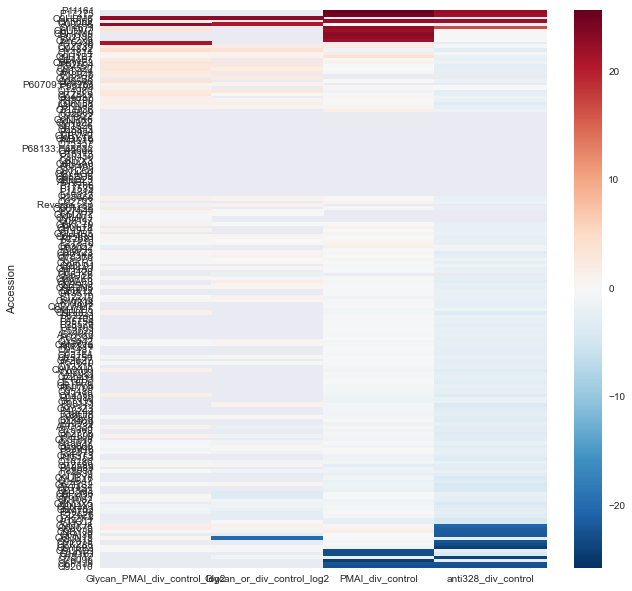

In [150]:
plt.figure(figsize=(10, 10))
seaborn.heatmap(protein_peptide_mergesort1.iloc[:,:-1], xticklabels=True, yticklabels=True)

In [151]:
protein_peptide_merge = protein_peptide_merge[['Glycan_PMAI_div_control_log2','Glycan_or_div_control_log2']]

In [154]:
protein_peptide_merge['sum'] = protein_peptide_merge.sum(1)
protein_peptide_mergesort = protein_peptide_merge.sort(columns='sum', ascending= False)

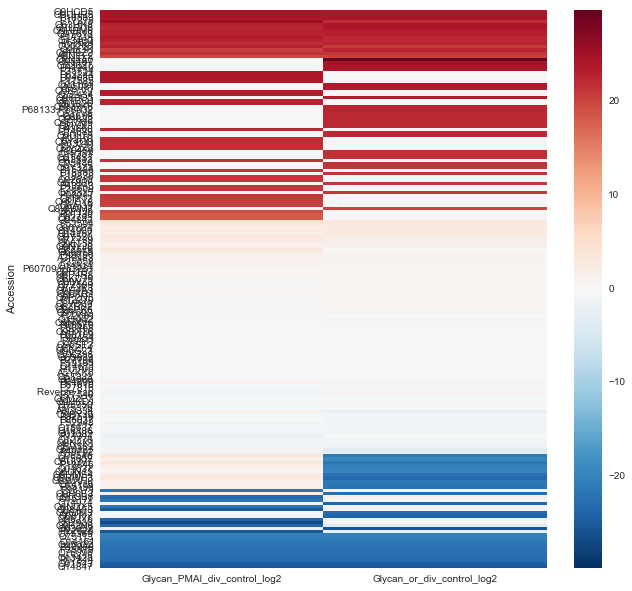

In [155]:
plt.figure(figsize=(10, 10))
seaborn.heatmap(protein_peptide_mergesort2.iloc[:,:-1], xticklabels=True, yticklabels=True)

In [45]:
dfgp_select = dfgp_select[dfgp_select['Glycan composition'].notnull()]

In [46]:
#dfgp2 is the index for glycan only sequences
dfgp2 = dfgp[dfgp['Glycan composition'].notnull()]

In [47]:
# number of HexNAz2Si unique sequences in the file
len(dfgp2['Sequence'].unique())

273

In [48]:
#glycan only peptides showing here
f = {'Precursor Area':['count','sum','mean']}
dfgp2.groupby(['Spectrum File','Sequence']).agg(f).head()

Precursor Area              \
                                                    count         sum   
Spectrum File Sequence                                                  
0_PMAI        AAASLAAVSGTAAASLGSAQPTDLGAHK              1  4825404.12   
              AALTQQHPPVTNGDTVK                         1  2445280.58   
              AANIVIQTEPPVPVSINSNITR                    2 52845730.75   
              ADRPSLEKPEPIHLSVSTPVTQGGTVK               1  1644779.50   
              AETQGANHTPVISAHQTR                        1  2138103.25   

                                                        
                                                  mean  
Spectrum File Sequence                                  
0_PMAI        AAASLAAVSGTAAASLGSAQPTDLGAHK  4825404.12  
              AALTQQHPPVTNGDTVK             2445280.58  
              AANIVIQTEPPVPVSINSNITR       26422865.38  
              ADRPSLEKPEPIHLSVSTPVTQGGTVK   1644779.50  
              AETQGANHTPVISAHQTR            2138103.25

In [49]:
dfgp2['Spectrum File'].unique()

array(['1_control', '1_PMAI', '3_control', '2_control', '2_PMAI', '2_or',
       '0_PMAI', '0_control', '1_or', '3_or', '3_PMAI', '0_or'], dtype=object)

In [50]:
# the p_c_ratio, o_c_ratio, p_c_logratio, and o_c_logratio are only on hexnaz2si filtered glycopeptides
#p_c_ratio, o_c_ratio, p_c_logratio, o_c_logratio =  ratios(dfgp)

p_c_ratio, o_c_ratio, p_c_logratio, o_c_logratio =  ratios(dfgp2)

In [51]:
#p_c_logratio[p_c_ratio.notnull().any(1)].to_excel('temp.xlsx')

In [52]:
#number of glycopeptide in each replicate that is also in both files of the comparison
print p_c_ratio.count()
print o_c_ratio.count()

Trial
0    81
1    59
2    77
3    71
dtype: int64
Trial
0    61
1    58
2    79
3    67
dtype: int64


In [53]:
threshhold = .5
p_c_logratio[p_c_logratio[np.abs(p_c_logratio) > threshhold].any(1)].shape

(81, 4)

In [54]:
x = p_c_logratio[p_c_logratio[np.abs(p_c_logratio) > threshhold].any(1)]

In [55]:
threshhold = 1
p_c_logratio[p_c_logratio[np.abs(p_c_logratio) > threshhold].any(1)].shape

(58, 4)

In [56]:
#showing all p_c_logratio for any value that is in both files of the same replicate
#p_c_logratio[p_c_logratio[np.abs(p_c_logratio) > threshhold].any(1)]
p_c_logratio[p_c_logratio.any(1)].head()

Trial                            0    1     2     3
Sequence                                           
AAASLAAVSGTAAASLGSAQPTDLGAHK   nan  nan  0.76 16.02
AALTQQHPPVTNGDTVK            14.71  nan   nan   nan
AANIVIQTEPPVPVSINSNITR        0.30 1.93  0.12  0.72
ADRPSLEKPEPIHLSVSTPVTQGGTVK    nan  nan -0.02   nan
AETQGANHTPVISAHQTR           -0.83 0.27  0.38  0.00

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113bc7f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a3770d0>]], dtype=object)

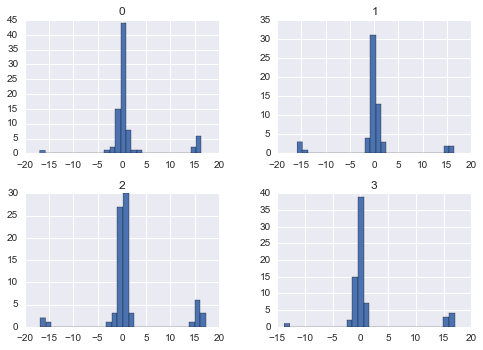

In [57]:
p_c_logratio.hist(bins=30, )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe79810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110929c10>]], dtype=object)

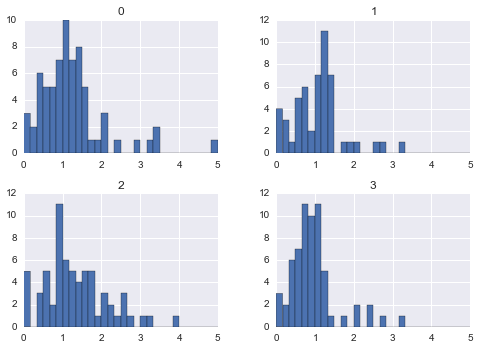

In [58]:
p_c_ratio.hist(bins=30, range=(0,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fc65a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a33e510>]], dtype=object)

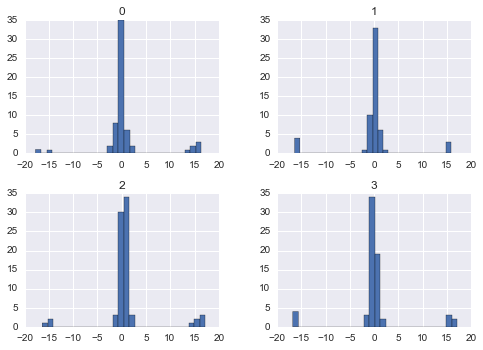

In [59]:
o_c_logratio.hist(bins=30)

In [60]:
# group the data together here based on the specified column names, only clumping the data together
#here am actually grouping all replicates together ("Trial")
group = dfgp.groupby(['Sequence','Version'])

In [61]:
# took the mean of the groups here and printed out the head of the file
group2 = group.mean()
group2.head()

# Proteins  # Protein Groups  ΔScore  ΔCn  Rank  \
Sequence          Version                                                    
AAAAAAALQAK       PMAI           1.00              1.00    1.00 0.00  1.00   
                  control        1.00              1.00    1.00 0.00  1.00   
                  or             1.00              1.00    1.00 0.00  1.00   
AAAFQHLLLLVGIHLLK PMAI           1.00              1.00    1.00 0.00  1.00   
                  control        1.00              1.00    1.00 0.00  1.00   

                           Search Engine Rank  QuanResultID  Precursor Area  \
Sequence          Version                                                     
AAAAAAALQAK       PMAI                   1.00           nan      2576223.03   
                  control                1.00           nan      2706258.47   
                  or                     1.00           nan      2385760.66   
AAAFQHLLLLVGIHLLK PMAI                   1.00           nan      1916495.23   
                  control                1.00           nan      2439659.43   

                           |Log Prob|  Byonic Score    ...      \
Sequence          Version                              ...       
AAAAAAALQAK       PMAI           4.69        290.74    ...       
                  control        7.06        354.46    ...       
                  or             7.97        442.23    ...       
AAAFQHLLLLVGIHLLK PMAI          13.95        777.72    ...       
                  control       10.40        592.94    ...       

                           # Missed Cleavages  Isolation Interference [%]  \
Sequence          Version                                                   
AAAAAAALQAK       PMAI                   0.00                       61.70   
                  control                0.00                       75.16   
                  or                     0.00                       71.01   
AAAFQHLLLLVGIHLLK PMAI                   0.00                       24.49   
                  control                0.00                       25.60   

                           Ion Inject Time [ms]  Charge  m/z [Da]  MH+ [Da]  \
Sequence          Version                                                     
AAAAAAALQAK       PMAI                   500.00    2.00    478.78    956.55   
                  control                500.00    2.00    478.78    956.55   
                  or                     500.00    2.00    478.78    956.55   
AAAFQHLLLLVGIHLLK PMAI                   500.00    3.00    619.72   1857.14   
                  control                500.00    3.00    619.72   1857.14   

                           ΔM [ppm]  RT [min]  First Scan  Last Scan  
Sequence          Version                                             
AAAAAAALQAK       PMAI        -2.24     28.29     3992.00    3992.00  
                  control     -2.30     27.75     3859.00    3859.00  
                  or          -1.47     28.24     3981.00    3981.00  
AAAFQHLLLLVGIHLLK PMAI        -2.86     96.49    11104.00   11104.00  
                  control     -2.76     96.76    11108.00   11108.00  

[5 rows x 24 columns]

In [62]:

dfgp.groupby(['Trial','Version']).mean()['Precursor Area']

Trial  Version
0      PMAI      10358916.58
       control   11754428.36
       or         9686079.53
1      PMAI      12099664.68
       control   13000547.82
       or        14695172.64
2      PMAI      23747551.72
       control   25726905.04
       or        31796132.15
3      PMAI      20514352.94
       control   26728238.50
       or        22988657.85
Name: Precursor Area, dtype: float64

In [63]:
#all sequences in a pivot
dfgp_pivot = dfgp.pivot_table(values='Precursor Area',index='Sequence',columns=['Trial','Version'], aggfunc='sum')

In [64]:
#only glycosylated sequences in a pivot
dfgp2_pivot = dfgp2.pivot_table(values='Precursor Area',index='Sequence',columns=['Trial','Version'], aggfunc='sum')

In [65]:
#glycosylated sequences from all four trials in a pivot
group2_pivot = dfgp2.pivot_table(values='Precursor Area',index=['Sequence','Protein Group Accessions'],columns=['Version'], aggfunc='sum')

In [66]:
pmai_control = group2_pivot.iloc[:,0]/ group2_pivot.iloc[:,1]
or_control = group2_pivot.iloc[:,2]/ group2_pivot.iloc[:,1]
or_pmai = group2_pivot.iloc[:,2]/ group2_pivot.iloc[:,0]

In [67]:
group3_pivot = group2_pivot.copy()
group3_pivot['pmai_control'] = pmai_control
group3_pivot['or_control'] = or_control
group3_pivot['or_pmai'] = or_pmai

In [68]:
group3_pivot.to_excel('group3_pivot.xlsx')

In [69]:
group3_pivot.sort('pmai_control', ascending=False)

Version                                                                             PMAI  \
Sequence                                           Protein Group Accessions                
GGGFFSGLGGKPSQDAANKNPFSSASGGFGSTATSNTSNLFGNSGAK    P35658                    18809538.75   
IGGPLGTGAFGAPGFNTTTATLGFGAPQAPVALTDPNASAAQQAVLQ... P52948                     9256987.25   
LSVGAVSSKPTTPTIATPQTVSVPNK                         Q9HBM6                     7644951.62   
QVSQAQTTVQPSATLQR                                  O00268                    28909752.79   
SHPSWLPPKSTGEPLGHVPAR                              Q93052                     3399428.75   
AALTQQHPPVTNGDTVK                                  P15336                     2445280.58   
ITFTKPSTQTTNTTTQK                                  Q7Z589                     4545875.38   
GLQLGQTSTATIQPSQQAQIVTR                            O94842                    33033372.72   
SQPAFMQSSLSQPSVVLSGTAIHNFPTVQHQELAK                Q9Y520                    39048601.83   
KYVLASQEQQMNEIVTIDQPVQIIPASVQSATPTTIK              Q06546                    27318096.78   
TVLSSSLNNHPQTSVPNASALHPSLR                         Q6UUV7                    27627297.25   
HLLPTSGAAATAAAAAAAAAAVTAASTSYYGR                   Q9BWF3                    83819456.77   
AAASLAAVSGTAAASLGSAQPTDLGAHK                       Q7Z5L9                    25892262.31   
SSSADFGTFNTSQSHQTASAVSK                            P52594                    76411317.78   
RETIQQSSSLTSVPPTTFSLTFK                            Q9Y520                    36270679.16   
SAPASQASLR                                         Q14980                     8662225.67   
EALATLKPQAGLIVPQAVPSSQPSVVGAGEPMDLGELVGMTPEIIQK    Q9UMS4                    25163941.86   
IGGDLTAAVTK                                        Q7Z739                    19936094.55   
HSHAVSTAAMTR                                       P51610                     7166983.19   
TTPSATSLPQTVVMTSPVTLTSQTTK                         P18846                     8164994.28   
TPPVTTNR                                           A3KN83                     4023904.88   
SPAVATSTAAPPPPSSPLPSK                              Q14157                    42931089.01   
AQPSASLGVGYR                                       Q96PK6                    34732938.39   
VVVTQPNTK                                          Q9NYJ8                    25549073.33   
ASDVDTSSSTLR                                       Q96T58                     6069288.66   
FGVSSSSSGPSQTLTSTGNFK                              P49790                   137116831.56   
TQGVPAVLKVTGPQATTGTPLVTMRPASQAGK                   P51610                     6021239.75   
ITHSPDSVK                                          Q15652                     2088025.86   
LGELLFPSSLAGETLGSFSGLR                             P35658                   137711185.91   
VATTSVITIVK                                        O60675                    59980922.00   
...                                                                                  ...   
TLLGDPAPSLSVAASTSSQPVSQSHAR                        O95081                            nan   
TLLQHVAQSQTATQTSVVVK                               Q7Z589                            nan   
TLTYMSHR                                           Q15022                            nan   
TPLSTGGTLAFVSPSLAVHK                               Q86YP4                    14861247.34   
TPPAVLQPIAPQTTFGVQTQPQPQSLLQAQISAASITPLLQTQPQPL... Q8IX12                           1.00   
TPSKGPGGGK                                         Reverse >sp                 115677.77   
TPVPVSVSHR                                         Q6AI39                     1293271.72   
TQFLTTPISQAQK                                      Q96L91                     1252301.69   
TQHTTTRPVPDTSR                                     P01130                      307398.18   
TQPSSQPLQSGQVLPSATPTPSAPPTSQQELQAK                 Q9HCD5                    24779197.53   
TSSEASVSSSVAK                               

In [70]:
group2_ratio = pmai_control, or_control, or_pmai

In [71]:
#high overview of data breakdown for all sequences
for trial in range(int(dfgp['Trial'].max())+1):
    print 'PMAI compared to control, TRIAL {}:'.format(trial)
    print 'PMAI > control: '
    print sum(dfgp_pivot[str(trial)]['PMAI'] > dfgp_pivot[str(trial)]['control'])
    print 'PMAI < control: '
    print sum(dfgp_pivot[str(trial)]['PMAI'] < dfgp_pivot[str(trial)]['control'])
    print 'PMAI null, control present'
    print sum(dfgp_pivot[str(trial)]['PMAI'].isnull() & dfgp_pivot[str(trial)]['control'].notnull()) 
    print 'PMAI present, control missing'
    print sum(dfgp_pivot[str(trial)]['PMAI'].notnull() & dfgp_pivot[str(trial)]['control'].isnull())
    #both missing. chose not to print because i don't believe this information is important
    #print sum(df_pivot[str(trial)]['PMAI'].isnull() & df_pivot[str(trial)]['control'].isnull())
    
    print 'OR compared to control, TRIAL {}:'.format(trial)
    print 'OR > control: '
    print sum(dfgp_pivot[str(trial)]['or'] > dfgp_pivot[str(trial)]['control'])
    print 'PMAI < control: '
    print sum(dfgp_pivot[str(trial)]['or'] < dfgp_pivot[str(trial)]['control'])
    print 'PMAI null, control present'
    print sum(dfgp_pivot[str(trial)]['or'].isnull() & dfgp_pivot[str(trial)]['control'].notnull()) 
    print 'PMAI present, control missing'
    print sum(dfgp_pivot[str(trial)]['or'].notnull() & dfgp_pivot[str(trial)]['control'].isnull())
    print

PMAI compared to control, TRIAL 0:
PMAI > control: 
825
PMAI < control: 
1884
PMAI null, control present
1022
PMAI present, control missing
988
OR compared to control, TRIAL 0:
OR > control: 
481
PMAI < control: 
1976
PMAI null, control present
1272
PMAI present, control missing
724

PMAI compared to control, TRIAL 1:
PMAI > control: 
239
PMAI < control: 
230
PMAI null, control present
461
PMAI present, control missing
489
OR compared to control, TRIAL 1:
OR > control: 
293
PMAI < control: 
142
PMAI null, control present
492
PMAI present, control missing
408

PMAI compared to control, TRIAL 2:
PMAI > control: 
232
PMAI < control: 
245
PMAI null, control present
504
PMAI present, control missing
505
OR compared to control, TRIAL 2:
OR > control: 
338
PMAI < control: 
121
PMAI null, control present
518
PMAI present, control missing
475

PMAI compared to control, TRIAL 3:
PMAI > control: 
116
PMAI < control: 
353
PMAI null, control present
494
PMAI present, control missing
460
OR compared

In [72]:
#breakdown of data comparisons for only glycopeptide sequences

for trial in range(int(dfgp['Trial'].max())+1):
    print 'PMAI compared to control, TRIAL {}:'.format(trial)
    print 'PMAI > control: '
    print sum(dfgp2_pivot[str(trial)]['PMAI'] > dfgp2_pivot[str(trial)]['control'])
    print 'PMAI < control: '
    print sum(dfgp2_pivot[str(trial)]['PMAI'] < dfgp2_pivot[str(trial)]['control'])
    print 'PMAI null, control present'
    print sum(dfgp2_pivot[str(trial)]['PMAI'].isnull() & dfgp2_pivot[str(trial)]['control'].notnull()) 
    print 'PMAI present, control missing'
    print sum(dfgp2_pivot[str(trial)]['PMAI'].notnull() & dfgp2_pivot[str(trial)]['control'].isnull())
    #both missing. chose not to print because i don't believe this information is important
    #print sum(df_pivot[str(trial)]['PMAI'].isnull() & df_pivot[str(trial)]['control'].isnull())
    
    print 'OR compared to control, TRIAL {}:'.format(trial)
    print 'OR > control: '
    print sum(dfgp2_pivot[str(trial)]['or'] > dfgp2_pivot[str(trial)]['control'])
    print 'PMAI < control: '
    print sum(dfgp2_pivot[str(trial)]['or'] < dfgp2_pivot[str(trial)]['control'])
    print 'PMAI null, control present'
    print sum(dfgp2_pivot[str(trial)]['or'].isnull() & dfgp2_pivot[str(trial)]['control'].notnull()) 
    print 'PMAI present, control missing'
    print sum(dfgp2_pivot[str(trial)]['or'].notnull() & dfgp2_pivot[str(trial)]['control'].isnull())
    print

PMAI compared to control, TRIAL 0:
PMAI > control: 
57
PMAI < control: 
24
PMAI null, control present
20
PMAI present, control missing
45
OR compared to control, TRIAL 0:
OR > control: 
21
PMAI < control: 
39
PMAI null, control present
40
PMAI present, control missing
20

PMAI compared to control, TRIAL 1:
PMAI > control: 
41
PMAI < control: 
18
PMAI null, control present
22
PMAI present, control missing
44
OR compared to control, TRIAL 1:
OR > control: 
42
PMAI < control: 
15
PMAI null, control present
23
PMAI present, control missing
34

PMAI compared to control, TRIAL 2:
PMAI > control: 
51
PMAI < control: 
26
PMAI null, control present
29
PMAI present, control missing
41
OR compared to control, TRIAL 2:
OR > control: 
58
PMAI < control: 
16
PMAI null, control present
27
PMAI present, control missing
37

PMAI compared to control, TRIAL 3:
PMAI > control: 
33
PMAI < control: 
37
PMAI null, control present
27
PMAI present, control missing
39
OR compared to control, TRIAL 3:
OR > contr

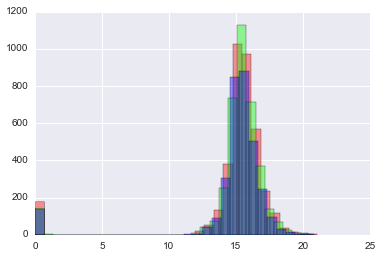

In [73]:
%matplotlib inline
#i = 0 means this is for replicate 0 only
i = 0
np.log(dfgp_pivot[str(i)]['control']).hist(bins=30, fc=(1, 0, 0, 0.4))
np.log(dfgp_pivot[str(i)]['PMAI']).hist(bins=30, fc=(0, 1, 0, 0.4))
np.log(dfgp_pivot[str(i)]['or']).hist(bins=30, fc=(0, 0, 1, 0.4))

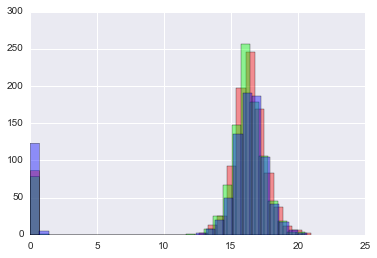

In [74]:
i = 3
np.log(dfgp_pivot[str(i)]['control']).hist(bins=30, fc=(1, 0, 0, 0.4))
np.log(dfgp_pivot[str(i)]['PMAI']).hist(bins=30, fc=(0, 1, 0, 0.4))
np.log(dfgp_pivot[str(i)]['or']).hist(bins=30, fc=(0, 0, 1, 0.4))

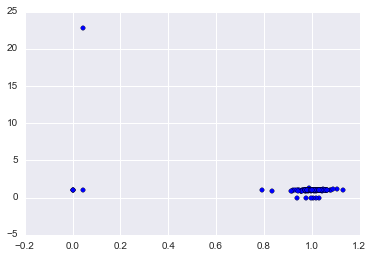

In [75]:
plt.scatter(np.log(dfgp_pivot['1']['PMAI'])/np.log(dfgp_pivot['1']['control']), np.log(dfgp_pivot['2']['PMAI'])/np.log(dfgp_pivot['2']['control']))

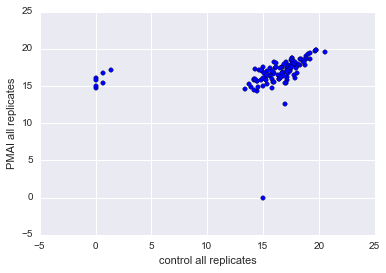

In [76]:
plt.scatter(np.log(group2_pivot['control']), np.log(group2_pivot['PMAI']))
plt.xlabel('control all replicates')
plt.ylabel('PMAI all replicates')

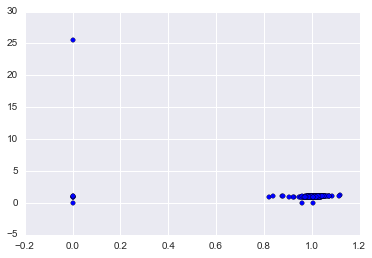

In [77]:
plt.scatter(np.log(dfgp_pivot['1']['or'])/np.log(dfgp_pivot['1']['control']), np.log(dfgp_pivot['2']['or'])/np.log(dfgp_pivot['2']['control']))

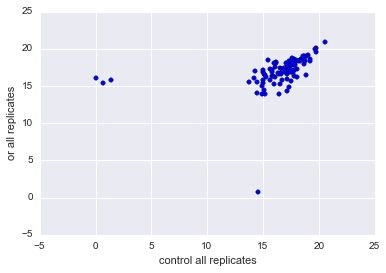

In [78]:
plt.scatter(np.log(group2_pivot['control']), np.log(group2_pivot['or']))
plt.xlabel('control all replicates')
plt.ylabel('or all replicates')

In [383]:
### Chart pattern analysis ###

In [359]:
cp = pd.read_excel(chartpattern,sheetname='Sheet1' )

In [586]:
cp2 = cp.copy()
cp2 = cp2.sort('score', ascending=False)
cp2 = cp2.reset_index()
cp2['m'] = cp2['m/z'] * cp2['z']

#Christina's set conversion from scanrange to seconds
scanrange_to_time = 0.5
cp2['scan range (seconds)'] = scanrange_to_time * cp2['scan range']
cp2['time start'] = cp2['time'] - cp2['scan range (seconds)']
cp2['time end'] = cp2['time'] + cp2['scan range (seconds)']
#cp2 = cp2.join(pd.DataFrame(cp2['File name'].str.split('_',1).tolist(),columns = ['Version','Trial']))
cp2['Version'] = cp2['File name'].str[:-2]
cp2['Trial'] = cp2['File name'].str[-1]

In [587]:
mz_limit = 0.01
score_floor = 15
cluster = []
cluster_file = []
agg_amplitude = np.zeros(cp2.shape[0])
agg_index = np.zeros(cp2.shape[0])
agg_index.fill(-1)
exceptions = []

for row in range(cp2.shape[0]):
    if row % 1000 == 0:
        print 'processing row {}'.format(row)
    mz_mask = np.abs(cp2['m/z'] - cp2.loc[row, 'm/z']) <= mz_limit
    z_mask = cp2['z'] == cp2.loc[row, 'z']
    scan_mask = (cp2['time start'] <= cp2.loc[row, 'time end']) | (cp2['time end'] >= cp2.loc[row, 'time start'])
    score_mask = cp2['score'] >= score_floor
    file_mask = cp2['File name'] == cp2.loc[row, 'File name']
    
    cluster_mask = (mz_mask & z_mask & scan_mask & score_mask)
    cluster_file_mask = (mz_mask & z_mask & scan_mask & score_mask & file_mask)
    
    cluster.append(cp2.index[cluster_mask].tolist())
    cluster_file.append(cp2.index[cluster_file_mask].tolist())
    
    #agg_index only calculates based off of cluster, which is conditioned from the 4 masks above
    if len(cluster_file[row]) > 0:
        if cluster_file[row][0] == row:
            agg_index[row] = cluster[-1][0]
            agg_amplitude[row] = cp2.ix[cluster_file[row],'amplitude'].sum()
    else:
        exceptions.append(row)
        #print cp2.loc[row, 'm/z'], cp2.loc[row, 'z'], cp2.loc[row, 'time end'], cp2.loc[row, 'time start']

processing row 0
processing row 1000
processing row 2000
processing row 3000
processing row 4000
processing row 5000
processing row 6000
processing row 7000
processing row 8000
processing row 9000
processing row 10000
processing row 11000
processing row 12000
processing row 13000
processing row 14000
processing row 15000
processing row 16000
processing row 17000
processing row 18000
processing row 19000
processing row 20000
processing row 21000
processing row 22000
processing row 23000
processing row 24000
processing row 25000
processing row 26000


In [624]:
cp2['agg_amplitude'] = agg_amplitude
cp2['agg_index'] = agg_index
cp2['cluster'] = cluster
cp2['cluster_file'] = cluster_file
cp2['Trial'].astype(int);

In [626]:
#checking that the cluster groups are consistent
#if row 10 cluster contains [10,21,48], that row 21 is also [10,21,48]
#found that it's largely true, 3160 of 3311 clusters are completely identical
#for non-identical, it's still not a major problem because comparisons of PMAI, or, control are still valid within the group
cp2['cluster_sum'] = [sum(row) for row in cp2['cluster']]

In [627]:
cp2_pivot = cp2.pivot_table(values='amplitude', index='agg_index', columns=['Version','Trial'],aggfunc='sum')

In [628]:
#nan are undetectable amplitudes. setting to a minimum threshhold of 10,000
min_ampliltude = 10000
cp3_pivot = cp2_pivot.fillna(min_ampliltude)

In [629]:
pmai_block = cp3_pivot.iloc[:,0:4]
control_block = cp3_pivot.iloc[:,4:8]
or_block = cp3_pivot.iloc[:,8:12]

#I wanted to subtract PMAI - control from the cp2_pivot, but don't know how. work around
pmai_control_col = pd.MultiIndex(levels=[['PMAI / control'],[0,1,2,3]], labels=[[0,0,0,0], [0,1,2,3]], names=[u'Version', u'Trial'])
pmai_control_chg = pd.DataFrame(data=(pmai_block.values / control_block.values), columns = pmai_control_col,index=cp3_pivot.index)

or_control_col = pd.MultiIndex(levels=[['or / control'],[0,1,2,3]], labels=[[0,0,0,0], [0,1,2,3]], names=[u'Version', u'Trial'])
or_control_chg = pd.DataFrame(data=(or_block.values / control_block.values), columns = or_control_col,index=cp3_pivot.index)

pmai_or_col = pd.MultiIndex(levels=[['PMAI / or'],[0,1,2,3]], labels=[[0,0,0,0], [0,1,2,3]], names=[u'Version', u'Trial'])
pmai_or_chg = pd.DataFrame(data=(pmai_block.values / or_block.values), columns = pmai_or_col,index=cp3_pivot.index)

#or_control_chg = (or_block.values - control_block.values)
#pmai_or_chg = (pmai_block.values - or_block.values)

In [630]:
cp3_chg = pd.concat([pmai_control_chg,or_control_chg,pmai_or_chg], axis=1).iloc[1:]

In [631]:
cp2_pivot.iloc[1:].head()

Version           PMAI                                            control  \
Trial                0           1            2            3            0   
agg_index                                                                   
0.00       23121143.00  8718876.00  14735970.00  11130702.00  19023672.00   
1.00      157564722.00 50419612.00 121632563.00 100876670.00 150742765.00   
2.00       11940952.00  3156717.00  15295913.00  11963098.00  13103593.00   
3.00       14042548.00  6688848.00  17398448.00  12858100.00  17193863.00   
4.00       43271595.00 13336630.00  34908976.00  26731609.00  40595840.00   

Version                                               or328              \
Trial               1            2            3           0           1   
agg_index                                                                 
0.00       6218885.00  11773914.00  12976727.00 14270103.00  6732969.00   
1.00      38590460.00 112316010.00 114982067.00 80842694.00 37830475.00   
2.00       3986590.00  11864729.00  10414314.00 16422108.00 12340193.00   
3.00       6831220.00  17460222.00  17731201.00 13816810.00 10563313.00   
4.00      12457541.00  28503859.00  32746144.00 29925413.00 16465646.00   

Version                            
Trial               2           3  
agg_index                          
0.00      14563738.00 11780652.00  
1.00      75825798.00 67138661.00  
2.00      39583107.00 30545107.00  
3.00      33614532.00 21548139.00  
4.00      52999661.00 36760763.00

In [632]:
pd.concat([(cp3_chg < 1).sum(),(cp3_chg == 1).sum(),(cp3_chg > 1).sum()],axis=1)
# 0 means numerator < denominator
# 1 means numerator = denominator
# 2 means numerator > denominator

0     1    2
Version        Trial                
PMAI / control 0      623  1783  754
               1      504  1958  698
               2      571  1883  706
               3      748  1855  557
or / control   0      750  1815  595
               1      472  1953  735
               2      498  1847  815
               3      636  1805  719
PMAI / or      0      612  1716  832
               1      706  1848  606
               2      776  1809  575
               3      767  1832  561

In [633]:
#exact ratio of 1 means both numerator and denominator were NaN
cp3_chg = cp3_chg.replace(1,np.nan)

In [634]:
#this shows one specific group
cp2[cp2['agg_index'] == 14].sort('File name').iloc[:,:-3]

index  File name   #    m/z  z scan start  scan end  scan range  \
agg_index                                                                    
109        17552     PMAI_0   4 692.99  3       3596   3840.00         245   
70         20682     PMAI_1  10 692.99  3       3006   3190.00         185   
14         22573     PMAI_2   2 692.99  3       2971   3165.00         195   
17         24569     PMAI_3   2 692.99  3       3041   3225.00         185   
242            8  control_0   9 692.99  3       3471   3695.00         225   
64          3050  control_1   5 692.99  3       2936   3110.00         175   
108         4827  control_2  12 692.99  3       2981   3165.00         185   
203         6803  control_3  21 692.99  3       3056   3250.00         195   
329         8749    or328_0  17 692.99  3       3591   3820.00         230   
55         11618    or328_1   5 692.99  3       3016   3200.00         185   
44         13515    or328_2   7 692.99  3       2986   3200.00         215   
19         15563    or328_3   4 692.99  3       3051   3265.00         215   

           time  matches  amplitude  score       m  scan range (seconds)  \
agg_index                                                                  
109        1536       48   79095208  99.70 2078.97                122.50   
70         1530       36   24370411 101.90 2078.97                 92.50   
14         1483       36   55585241 106.70 2078.97                 97.50   
17         1504       36   46345625 106.30 2078.97                 92.50   
242        1503       44   81531353  95.20 2078.97                112.50   
64         1496       32   26562263 102.30 2078.97                 87.50   
108        1474       36   61621483  99.80 2078.97                 92.50   
203        1524       38   60347844  96.30 2078.97                 97.50   
329        1531       45   63203610  92.90 2078.97                115.00   
55         1529       36   34008759 102.70 2078.97                 92.50   
44         1467       42   81997468 103.50 2078.97                107.50   
19         1522       42   68883286 105.80 2078.97                107.50   

           time start  time end  Version Trial  agg_amplitude  agg_index  
agg_index                                                                 
109           1413.50   1658.50     PMAI     0    79095208.00      14.00  
70            1437.50   1622.50     PMAI     1    24370411.00      14.00  
14            1385.50   1580.50     PMAI     2    55585241.00      14.00  
17            1411.50   1596.50     PMAI     3    46345625.00      14.00  
242           1390.50   1615.50  control     0    81531353.00      14.00  
64            1408.50   1583.50  control     1    26562263.00      14.00  
108           1381.50   1566.50  control     2    61621483.00      14.00  
203           1426.50   1621.50  control     3    60347844.00      14.00  
329           1416.00   1646.00    or328     0    63203610.00      14.00  
55            1436.50   1621.50    or328     1    34008759.00      14.00  
44            1359.50   1574.50    or328     2    84209245.00      14.00  
19            1414.50   1629.50    or328     3    68883286.00      14.00

In [635]:
#ratio between treatments
#log centers no change around zero, and makes the increase and decrease distribution roughly symmetrical
#without the log transform, the distribution of ratio is around 0, decrease is between 0 and 1, and increase
#is 1 to infinity

cp3_logchg = np.log(cp3_chg)
cp3_logchg.head()

Version   PMAI / control                   or / control                    \
Trial                  0     1     2     3            0     1     2     3   
agg_index                                                                   
0.00                0.20  0.34  0.22 -0.15        -0.29  0.08  0.21 -0.10   
1.00                0.04  0.27  0.08 -0.13        -0.62 -0.02 -0.39 -0.54   
2.00               -0.09 -0.23  0.25  0.14         0.23  1.13  1.20  1.08   
3.00               -0.20 -0.02 -0.00 -0.32        -0.22  0.44  0.66  0.19   
4.00                0.06  0.07  0.20 -0.20        -0.30  0.28  0.62  0.12   

Version   PMAI / or                    
Trial             0     1     2     3  
agg_index                              
0.00           0.48  0.26  0.01 -0.06  
1.00           0.67  0.29  0.47  0.41  
2.00          -0.32 -1.36 -0.95 -0.94  
3.00           0.02 -0.46 -0.66 -0.52  
4.00           0.37 -0.21 -0.42 -0.32

In [636]:
cp4_logchg= cp3_logchg.copy()
levels = cp4_logchg.columns.levels
labels = cp4_logchg.columns.labels
cp4_logchg.columns = levels[0][labels[0]]

In [638]:
#count of groups that increase/decrease, across all 4 trials
cp4_summary = pd.concat( [(cp4_logchg < 0).stack().reset_index().groupby('Version').sum().iloc[:,1], (cp4_logchg > 0).stack().reset_index().groupby('Version').sum().iloc[:,1]], axis=1)
cp4_summary.columns = ['decrease','increase']
cp4_summary

decrease  increase
Version                           
PMAI / control   2446.00   2715.00
PMAI / or        2861.00   2574.00
or / control     2356.00   2864.00

In [639]:
#once the treatments are in ratios, I can combine the 4 trials
#idiosyncratic factors cancel out
cp3_logchg_stack = pd.concat([
cp3_logchg.iloc[:, cp3_logchg.columns.get_level_values(0)=='PMAI / control'].stack(),
cp3_logchg.iloc[:, cp3_logchg.columns.get_level_values(0)=='or / control'].stack(),
cp3_logchg.iloc[:, cp3_logchg.columns.get_level_values(0)=='PMAI / or'].stack(),],axis=1)

In [640]:
cp3_logchg_stack.describe()

PMAI / control  or / control  PMAI / or
count         5161.00       5220.00    5435.00
mean             0.15          0.18      -0.03
std              3.33          3.57       3.61
min             -8.28         -8.28      -8.50
25%             -2.36         -2.97      -3.24
50%              0.07          0.22      -0.11
75%              3.14          3.34       3.33
max              8.30          8.50       8.38

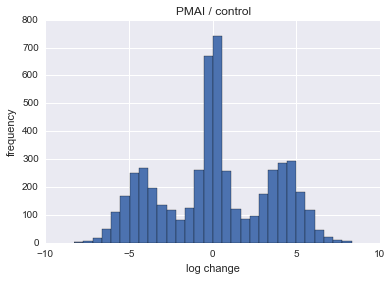

In [658]:
cp3_logchg_stack.iloc[:,0].hist( bins= 30)
plt.title(cp3_logchg_stack.columns[0])
plt.xlabel('log change')
plt.ylabel('frequency')

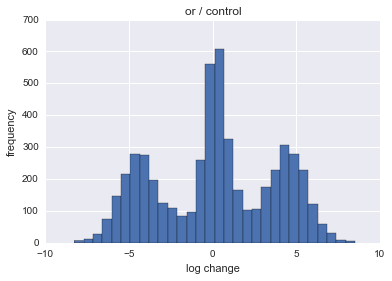

In [659]:
cp3_logchg_stack.iloc[:,1].hist( bins= 30)
plt.title(cp3_logchg_stack.columns[1])
plt.xlabel('log change')
plt.ylabel('frequency')

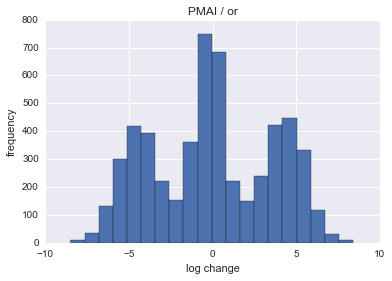

In [660]:
cp3_logchg_stack.iloc[:,2].hist( bins= 20)
plt.title(cp3_logchg_stack.columns[2])
plt.xlabel('log change')
plt.ylabel('frequency')

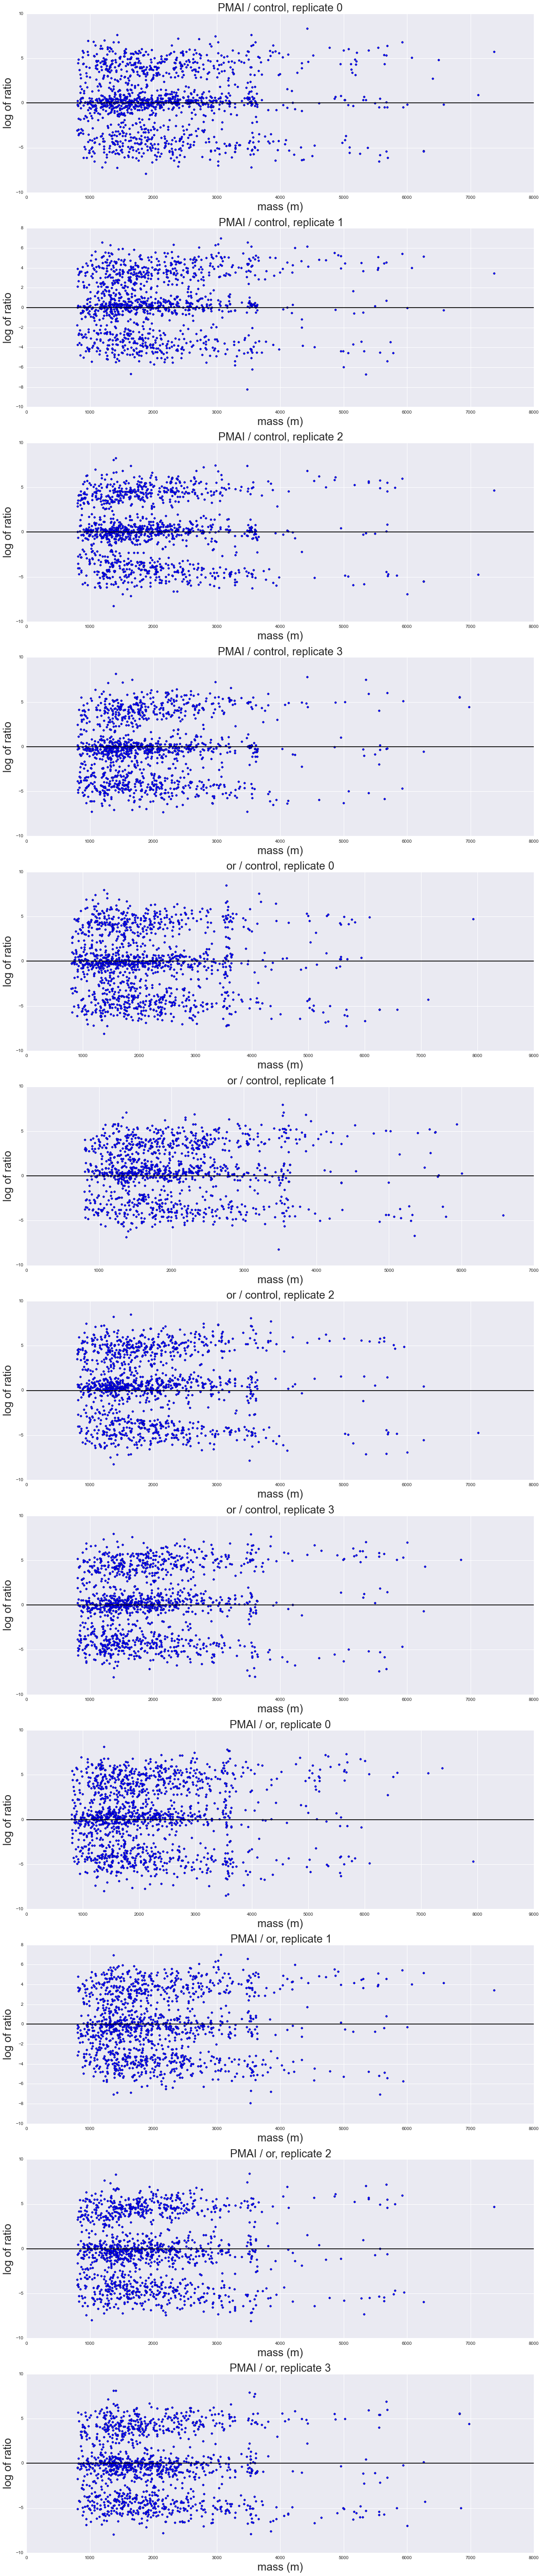

In [644]:
#plt.scatter(np.log(cp2.ix[cp3_chg.iloc[:,0].index]['m']), np.log(cp3_chg.iloc[:,0]))
#plt.title('{}, replicate {}'.format(*cp3_chg.columns[0]))
fig, axes = plt.subplots(12,1, figsize=(20, 100))
for idx in range(12):
    axes[idx].scatter(cp2.ix[cp3_chg.iloc[:,idx].index]['m'], np.log(cp3_chg.iloc[:,idx]))
    axes[idx].set_xlabel('mass (m)', fontdict = {'fontsize':24})
    axes[idx].set_ylabel('log of ratio', fontdict = {'fontsize':24})
    axes[idx].set_title('{}, replicate {}'.format(*cp3_chg.columns[idx]), fontdict = {'fontsize':24})
    axes[idx].axhline(c='black')

In [645]:
#unique rows that show up in cluster
import itertools
ab = itertools.chain(*cluster)
unique_data = set(ab)

In [646]:
#These values should be the same. slight difference, but magnitude is small enough that i'm not investigating for now

print 'amplitude filtered for unique cluster values: {}'.format(cp2.loc[unique_data]['amplitude'].sum())
print 'aggregate amplitude: {}'.format(cp2['agg_amplitude'].sum())

amplitude filtered for unique cluster values: 56355503934
aggregate amplitude: 56229850471.0


In [647]:
from collections import Counter
cluster_len = [len(row) for row in cp2['cluster']]
Counter(cluster_len)

Counter({0: 5590, 1: 3675, 2: 2412, 12: 1790, 3: 1577, 4: 1370, 5: 1338, 6: 993, 7: 949, 9: 801, 8: 758, 10: 758, 11: 730, 14: 637, 13: 551, 17: 317, 16: 296, 15: 279, 19: 218, 23: 208, 18: 166, 20: 161, 24: 135, 21: 104, 46: 99, 25: 94, 22: 78, 34: 72, 29: 60, 36: 47, 38: 45, 31: 43, 35: 41, 30: 40, 28: 34, 26: 33, 33: 25, 40: 22, 27: 17, 39: 13})

In [648]:
#determine the minimum value to substitute for the nan values
cp2[cp2['agg_amplitude']>0].groupby('File name').min()

index  #    m/z  z  scan start  scan end  scan range  time  \
File name                                                               
PMAI_0     17549  1 402.71  2        2176   2225.00          10   740   
PMAI_1     20673  1 402.21  2        1931   1970.00          15   729   
PMAI_2     22572  1 402.21  2        1831   1850.00          10   681   
PMAI_3     24568  1 402.71  2        1906   1915.00          10   703   
control_0      0  1 400.24  2        2096   2170.00          10   720   
control_1   3046  1 402.23  2        1851   1890.00          10   700   
control_2   4816  1 402.71  2        1806   1825.00          10   670   
control_3   6783  1 402.71  2        2126   2150.00          10   813   
or328_0     8733  1 402.71  2        2171   2240.00          10   742   
or328_1    11614  1 402.71  2        1661   1680.00          10   609   
or328_2    13509  1 400.25  2        1821   1840.00          10   677   
or328_3    15560  1 402.71  2        1871   1905.00          10   689   

           matches  amplitude     ...      scan range (seconds)  time start  \
File name                         ...                                         
PMAI_0           1      13673     ...                      5.00      715.00   
PMAI_1           2      23452     ...                      7.50      709.00   
PMAI_2           1      22487     ...                      5.00      671.00   
PMAI_3           1      18533     ...                      5.00      698.00   
control_0        1      13478     ...                      5.00      682.50   
control_1        1      11949     ...                      5.00      680.00   
control_2        1      22058     ...                      5.00      660.00   
control_3        1      20596     ...                      5.00      800.50   
or328_0          1      10716     ...                      5.00      707.00   
or328_1          1      10867     ...                      5.00      599.00   
or328_2          1      20766     ...                      5.00      667.00   
or328_3          1      23177     ...                      5.00      671.50   

           time end  Version  Trial agg_amplitude agg_index  \
File name                                                     
PMAI_0       765.00     PMAI      0      13673.00      0.00   
PMAI_1       749.00     PMAI      1      23452.00      0.00   
PMAI_2       691.00     PMAI      2      22487.00      0.00   
PMAI_3       708.00     PMAI      3      18533.00      0.00   
control_0    757.50  control      0      22517.00      0.00   
control_1    720.00  control      1      11949.00      0.00   
control_2    680.00  control      2      22058.00      0.00   
control_3    825.50  control      3      20596.00      0.00   
or328_0      773.00    or328      0      10716.00      0.00   
or328_1      619.00    or328      1      10867.00      0.00   
or328_2      687.00    or328      2      20766.00      0.00   
or328_3      706.50    or328      3      23177.00      0.00   

                                                     cluster  \
File name                                                      
PMAI_0     [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
PMAI_1     [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
PMAI_2     [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
PMAI_3     [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
control_0  [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
control_1  [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
control_2  [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
control_3  [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
or328_0    [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
or328_1    [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
or328_2    [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   
or328_3    [0, 10, 81, 113, 130, 167, 175, 188, 221, 235,...   

                    cluster_file cluster_sum  
File name                                     
PMAI_0 

In [649]:
cp2_name = sorted(cp2['File name'].unique())
cp2_name

[u'PMAI_0',
 u'PMAI_1',
 u'PMAI_2',
 u'PMAI_3',
 u'control_0',
 u'control_1',
 u'control_2',
 u'control_3',
 u'or328_0',
 u'or328_1',
 u'or328_2',
 u'or328_3']

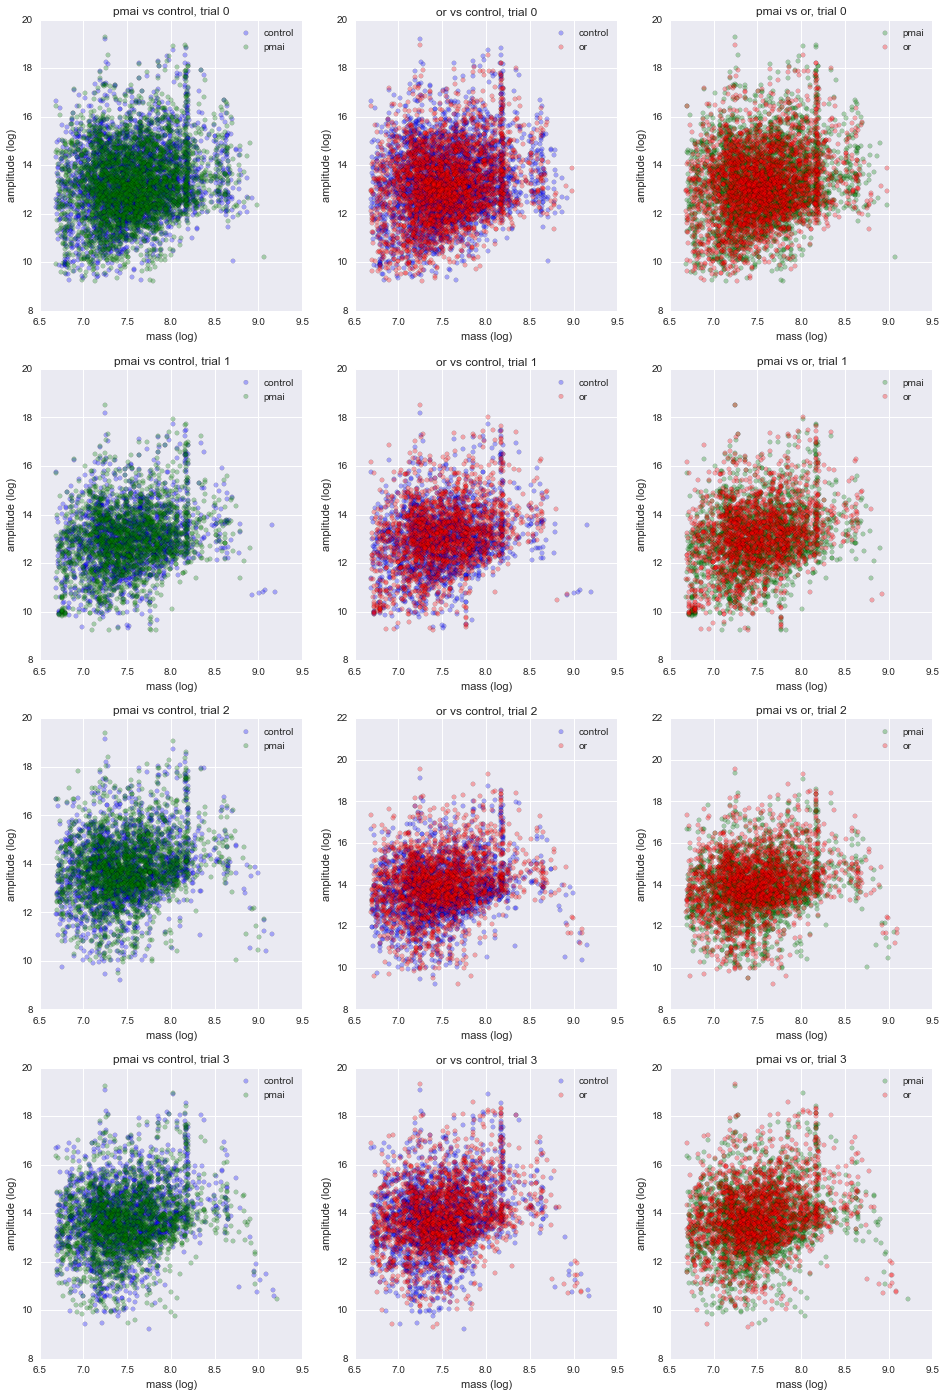

In [650]:
#blue = control
#red = or
#green = pmai
fig, axes = plt.subplots(4,3, figsize=(16, 24))
for idx in range(4):
    #IMPORTANT! Assumes that the cp2 name is 12 in length. 4 pmai, 4 or, 4 control
    #PMAI vs control
    axes[idx, 0].scatter( np.log(cp2[cp2['File name'] == cp2_name[idx + 4]]['m']), np.log(cp2[cp2['File name'] == cp2_name[idx + 4]]['amplitude']),c='b', label = 'control', alpha = 0.3)
    axes[idx, 0].scatter( np.log(cp2[cp2['File name'] == cp2_name[idx]]['m']), np.log(cp2[cp2['File name'] == cp2_name[idx]]['amplitude']), c='g', label = 'pmai', alpha = 0.3)
    axes[idx, 0].set_title('pmai vs control, trial {}'.format(idx))
    axes[idx, 0].set_xlabel('mass (log)')
    axes[idx, 0].set_ylabel('amplitude (log)')
    axes[idx, 0].legend()
    
    #or vs control
    axes[idx, 1].scatter( np.log(cp2[cp2['File name'] == cp2_name[idx + 4]]['m']), np.log(cp2[cp2['File name'] == cp2_name[idx + 4]]['amplitude']),c='b', label = 'control', alpha = 0.3)
    axes[idx, 1].scatter( np.log(cp2[cp2['File name'] == cp2_name[idx + 8]]['m']), np.log(cp2[cp2['File name'] == cp2_name[idx + 8]]['amplitude']), c='r', label = 'or', alpha = 0.3)
    axes[idx, 1].set_title('or vs control, trial {}'.format(idx))
    axes[idx, 1].set_xlabel('mass (log)')
    axes[idx, 1].set_ylabel('amplitude (log)')
    axes[idx, 1].legend()
    
    #pmai vs or
    axes[idx, 2].scatter( np.log(cp2[cp2['File name'] == cp2_name[idx]]['m']), np.log(cp2[cp2['File name'] == cp2_name[idx]]['amplitude']),c='g', label = 'pmai', alpha = 0.3)
    axes[idx, 2].scatter( np.log(cp2[cp2['File name'] == cp2_name[idx + 8]]['m']), np.log(cp2[cp2['File name'] == cp2_name[idx + 8]]['amplitude']), c='r', label = 'or', alpha = 0.3)
    axes[idx, 2].set_title('pmai vs or, trial {}'.format(idx))
    axes[idx, 2].set_xlabel('mass (log)')
    axes[idx, 2].set_ylabel('amplitude (log)')
    axes[idx, 2].legend()

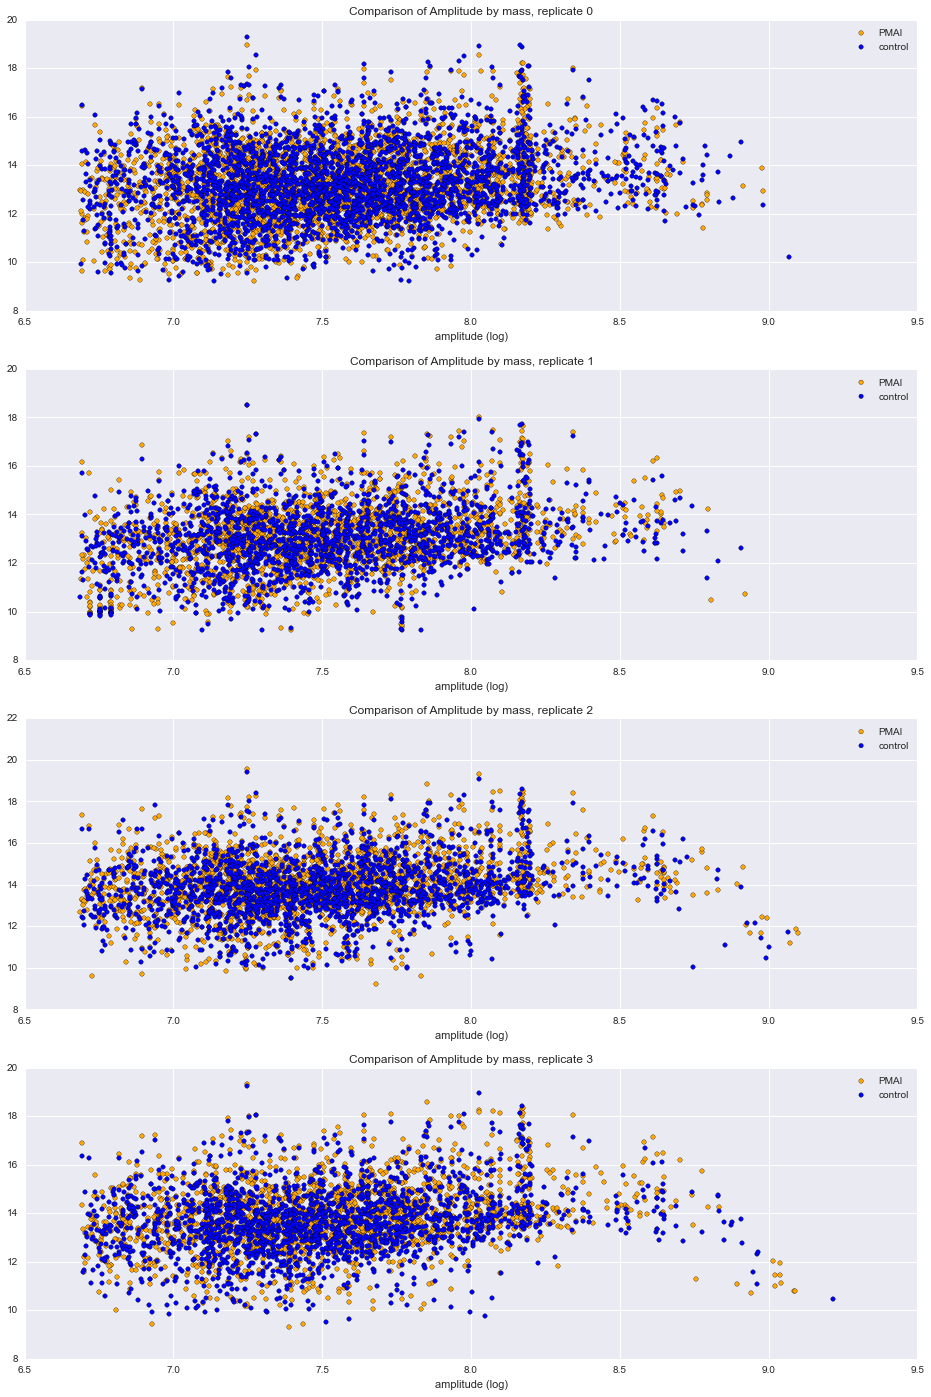

In [651]:
fig, axes = plt.subplots(4,1, figsize=(16, 24))
for idx in range(4):
    #IMPORTANT! Assumes that the cp2 name is 12 in length. 4 pmai, 4 or, 4 control
    #PMAI vs control
    axes[idx].scatter( np.log(cp2[cp2['File name'] == cp2_name[idx + 8]]['m']), np.log(cp2[cp2['File name'] == cp2_name[idx + 8]]['amplitude']),c='orange', label = 'PMAI')
    axes[idx].scatter( np.log(cp2[cp2['File name'] == cp2_name[idx]]['m']), np.log(cp2[cp2['File name'] == cp2_name[idx ]]['amplitude']), c='b', label = 'control')
    axes[idx].set_xlabel('mass (log)')
    axes[idx].set_xlabel('amplitude (log)')
    axes[idx].legend()
    axes[idx].set_title('Comparison of Amplitude by mass, replicate {}'.format(idx))

In [652]:
cp2_version = sorted(cp2['Version'].unique())
cp2_version

[u'PMAI', u'control', u'or328']

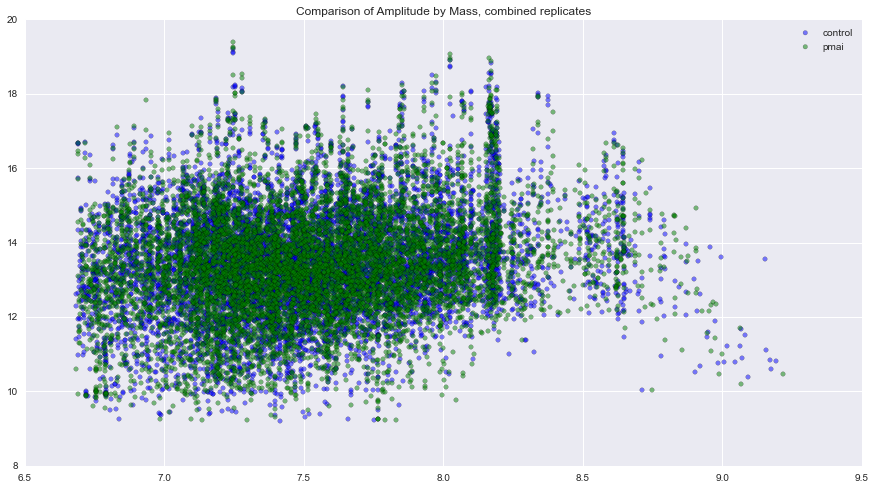

In [653]:
#pmai vs control
plt.figure(figsize=(15,8))

plt.scatter( np.log(cp2[cp2['Version'] == cp2_version[1]]['m']), np.log(cp2[cp2['Version'] == cp2_version[1]]['amplitude']),c='b', alpha = 0.5, label = 'control')
plt.scatter( np.log(cp2[cp2['Version'] == cp2_version[0]]['m']), np.log(cp2[cp2['Version'] == cp2_version[0]]['amplitude']), c='g', alpha = 0.5, label = 'pmai')
plt.legend()
plt.title('Comparison of Amplitude by Mass, combined replicates')

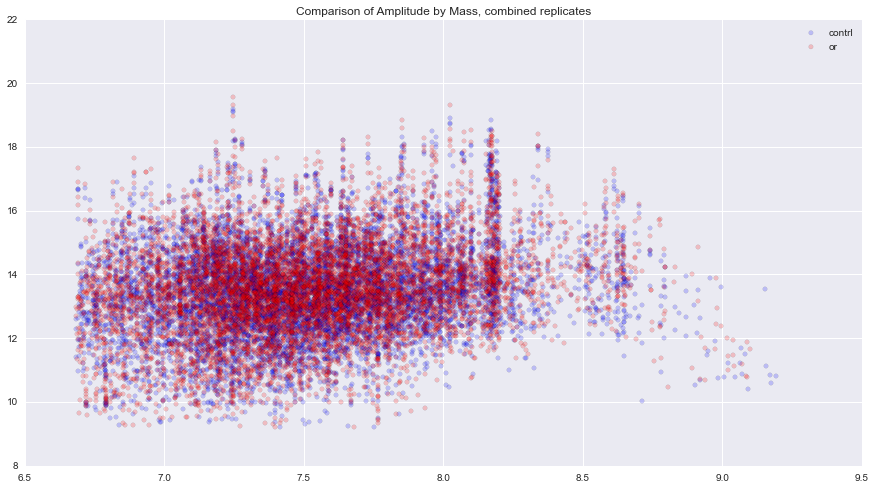

In [654]:
#or vs control
plt.figure(figsize=(15,8))
plt.scatter( np.log(cp2[cp2['Version'] == cp2_version[1]]['m']), np.log(cp2[cp2['Version'] == cp2_version[1]]['amplitude']),c='b', alpha = 0.2, label = 'contrl')
plt.scatter( np.log(cp2[cp2['Version'] == cp2_version[2]]['m']), np.log(cp2[cp2['Version'] == cp2_version[2]]['amplitude']), c='r', alpha = 0.2, label = 'or')
plt.legend()
plt.title('Comparison of Amplitude by Mass, combined replicates')

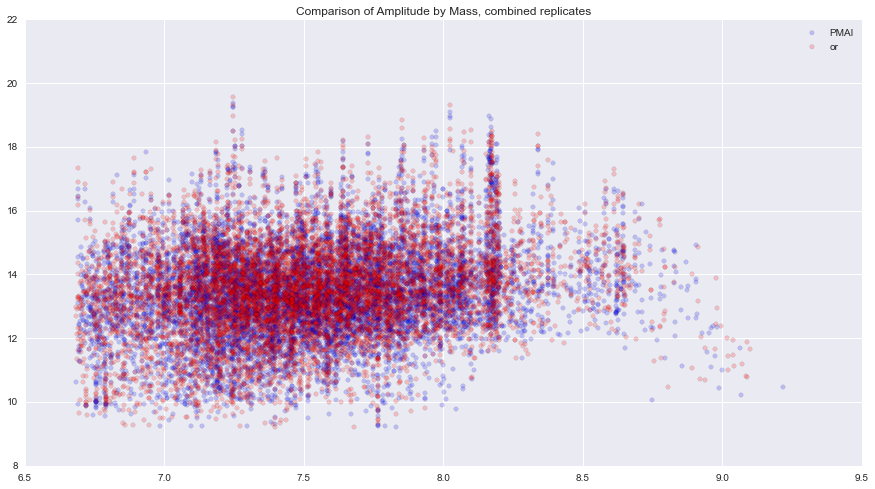

In [655]:
#or vs pmai
plt.figure(figsize=(15,8))
plt.scatter( np.log(cp2[cp2['Version'] == cp2_version[0]]['m']), np.log(cp2[cp2['Version'] == cp2_version[0]]['amplitude']),c='b', alpha = 0.2, label = 'PMAI')
plt.scatter( np.log(cp2[cp2['Version'] == cp2_version[2]]['m']), np.log(cp2[cp2['Version'] == cp2_version[2]]['amplitude']), c='r', alpha = 0.2, label = 'or')
plt.legend()
plt.title('Comparison of Amplitude by Mass, combined replicates')